# GIS in Python - First Steps

Working with spatial data can be challenging and, thus, it comes as no surprise that programming with spatial data can be complicated. We have already seen the OGC Simple Features standard and the shapely python library that provides us with simple geometry and relations. However, how do we actually work with spatial data in Python? The answer is: we don't know yet. There are many good ways including, but not limited to
- avoiding direct manipulation, for example, use Python to steer a spatial RDBMS such as oracle or GeoPackage
- avoiding spatial libraries, for example, read data and forget metadat (e.g., spatial images become images, spatial points become numeric tensors). Do your work (carefully!) and maybe export with metadata again
- using spatial Python libraries

In this example, we choose the last option, but let me strongly argue that this is not a good decision. Everything we do can be done more easily in different environments, but in a programming course, we can still learn something...

In [1]:
import geopandas as gpd
from matplotlib import pyplot as plt 

In [2]:

data = gpd.read_file("admin6munich/admin625832.shp") # these are administrative boundaries near munich on level 6 from OSM



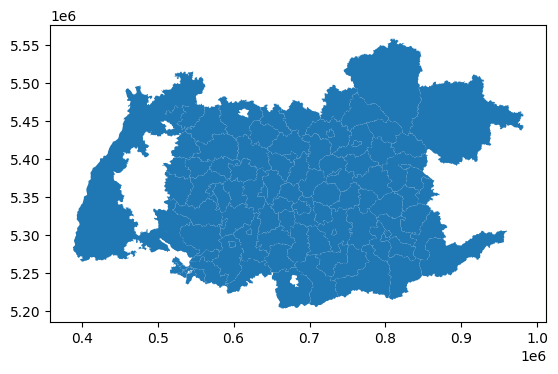

In [3]:
data.plot()
plt.show()

# Disclaimer
Loops in Python are slow. And pandas and geopandas help you to avoid such loops. Only for learning how to work with the data in a pandas data frame, we do the following task as a loop in Python: 

for each polygon, we compute the area and plot it as a color

In [4]:
print(data["name"])


0                          Bezirk Reutte
1                          Bezirk Liezen
2                             Kaufbeuren
3                       Landkreis Erding
4      Landkreis Pfaffenhofen an der Ilm
                     ...                
106     Landratsamt Berchtesgadener Land
107                                 None
108               Landratsamt Deggendorf
109                        Bürgerdienste
110               Bezirkshauptmannschaft
Name: name, Length: 111, dtype: object


In [5]:
for index,row in data.iterrows():
    print(index)
    print(type(row['geometry']))#
    print(row['geometry'].area)
    break

0
<class 'shapely.geometry.multipolygon.MultiPolygon'>
1235937070.124006


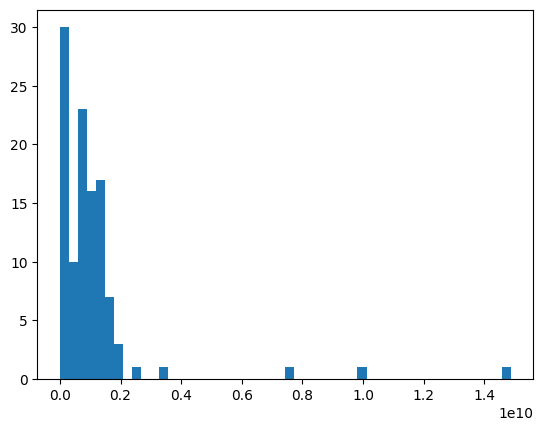

In [6]:
areas = [row['geometry'].area  for index,row in data.iterrows()]
plt.hist(areas, bins=50)
plt.show()

In [7]:
import pandas as pd
aseries=pd.Series(areas)
data = data.assign(A=aseries)

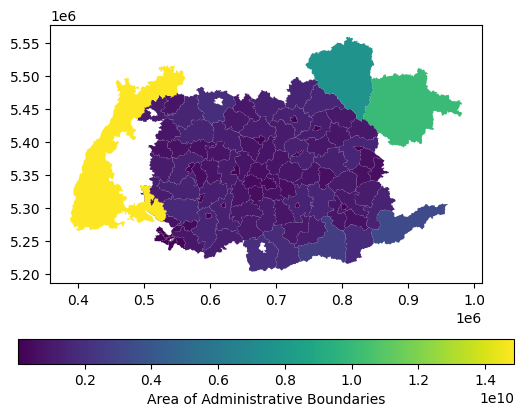

In [8]:
data.plot(
    column="A",
    legend=True,
    legend_kwds={"label": "Area of Administrative Boundaries", "orientation": "horizontal"},
);
plt.show()


# Data Selection Example
In this figure, we could argue that there are obviously bad polygons that are too large. Maybe the yellow and green ones. 
Geopandas can be used to filter data based on attributes and we could insist on the smaller ones:

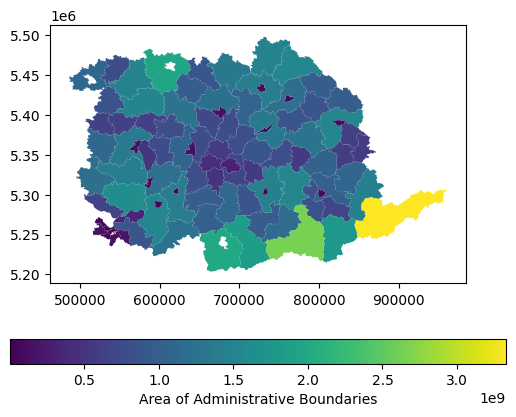

In [9]:
data[data['A']<0.6e10].plot(
    column="A",
    legend=True,
    legend_kwds={"label": "Area of Administrative Boundaries", "orientation": "horizontal"},
);
plt.show()


# A complex algorithm example - not fast though

Let us count the number of buildings per square kilometer in each of those polygons. Let us first fix the polygons of the last layer in a variable units.

In [10]:
units = data[data['A']<0.6e10]

... and load all buildings ...

In [11]:
buildings = gpd.read_file("Oberbayern/Oberbayern-hausumringe.shp") # pretty slow!

This does not reasonably work. Geopandas is not able to do what we want due to the layered structure. In my computer (business laptop) it does load with only 0.6 MB/s.

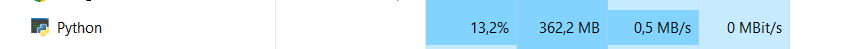

Note that this is not challenging in general. Reading the same data into a C++ system takes less than 4 seconds on a normal computer. Consequently, you can only do GIS in small scale with current geospatial libraries unless you are very patient. Use C++ (or other specialized libraries) in favour of feature-rich, but inefficient approaches.

**When working with geospatial data, this is a very common situation: while you have a tool that is able to solve your problem in principle, it does not in the real setting. This is an issue for GIS datasets, point clouds, big geospatial images, etc. and the reason, why a specific professorship for Big Geospatial Data has been established in TUM**